In [ ]:
from IPython.display import Image

import numpy as np 
import matplotlib.pyplot as plt

import os
import cv2

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

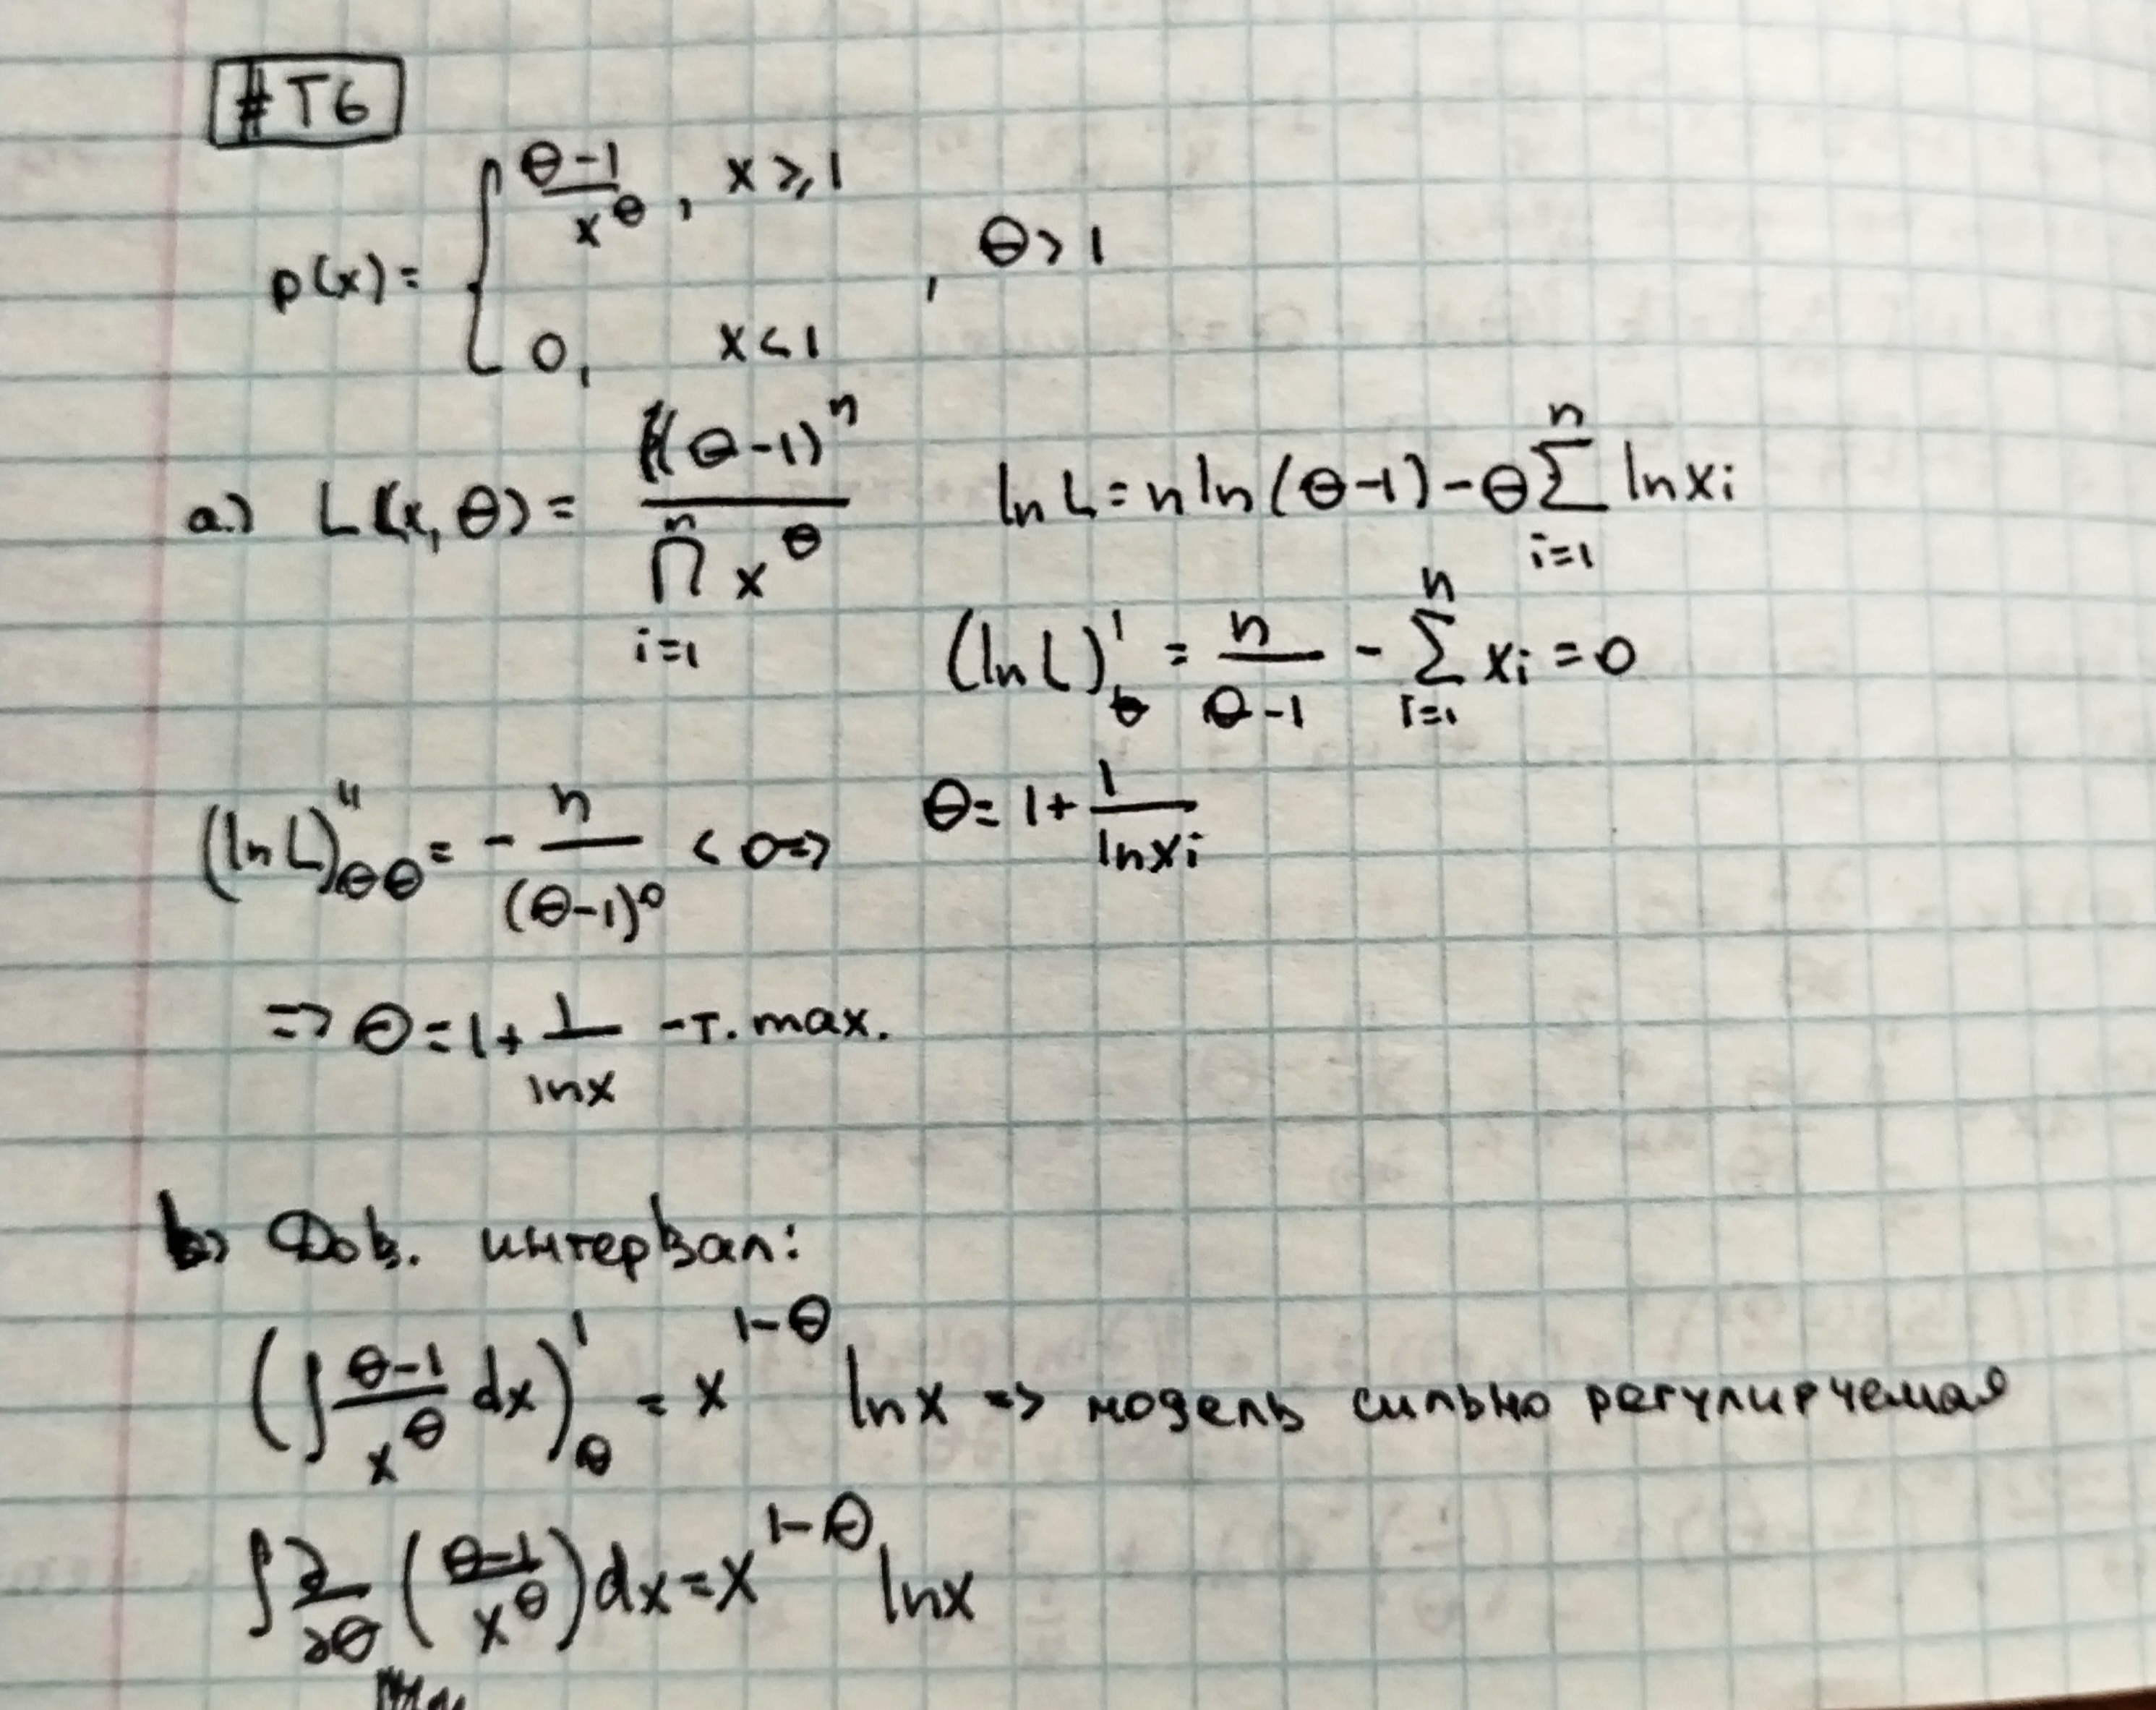

In [2]:
Image("pics/task_6_1.jpg")

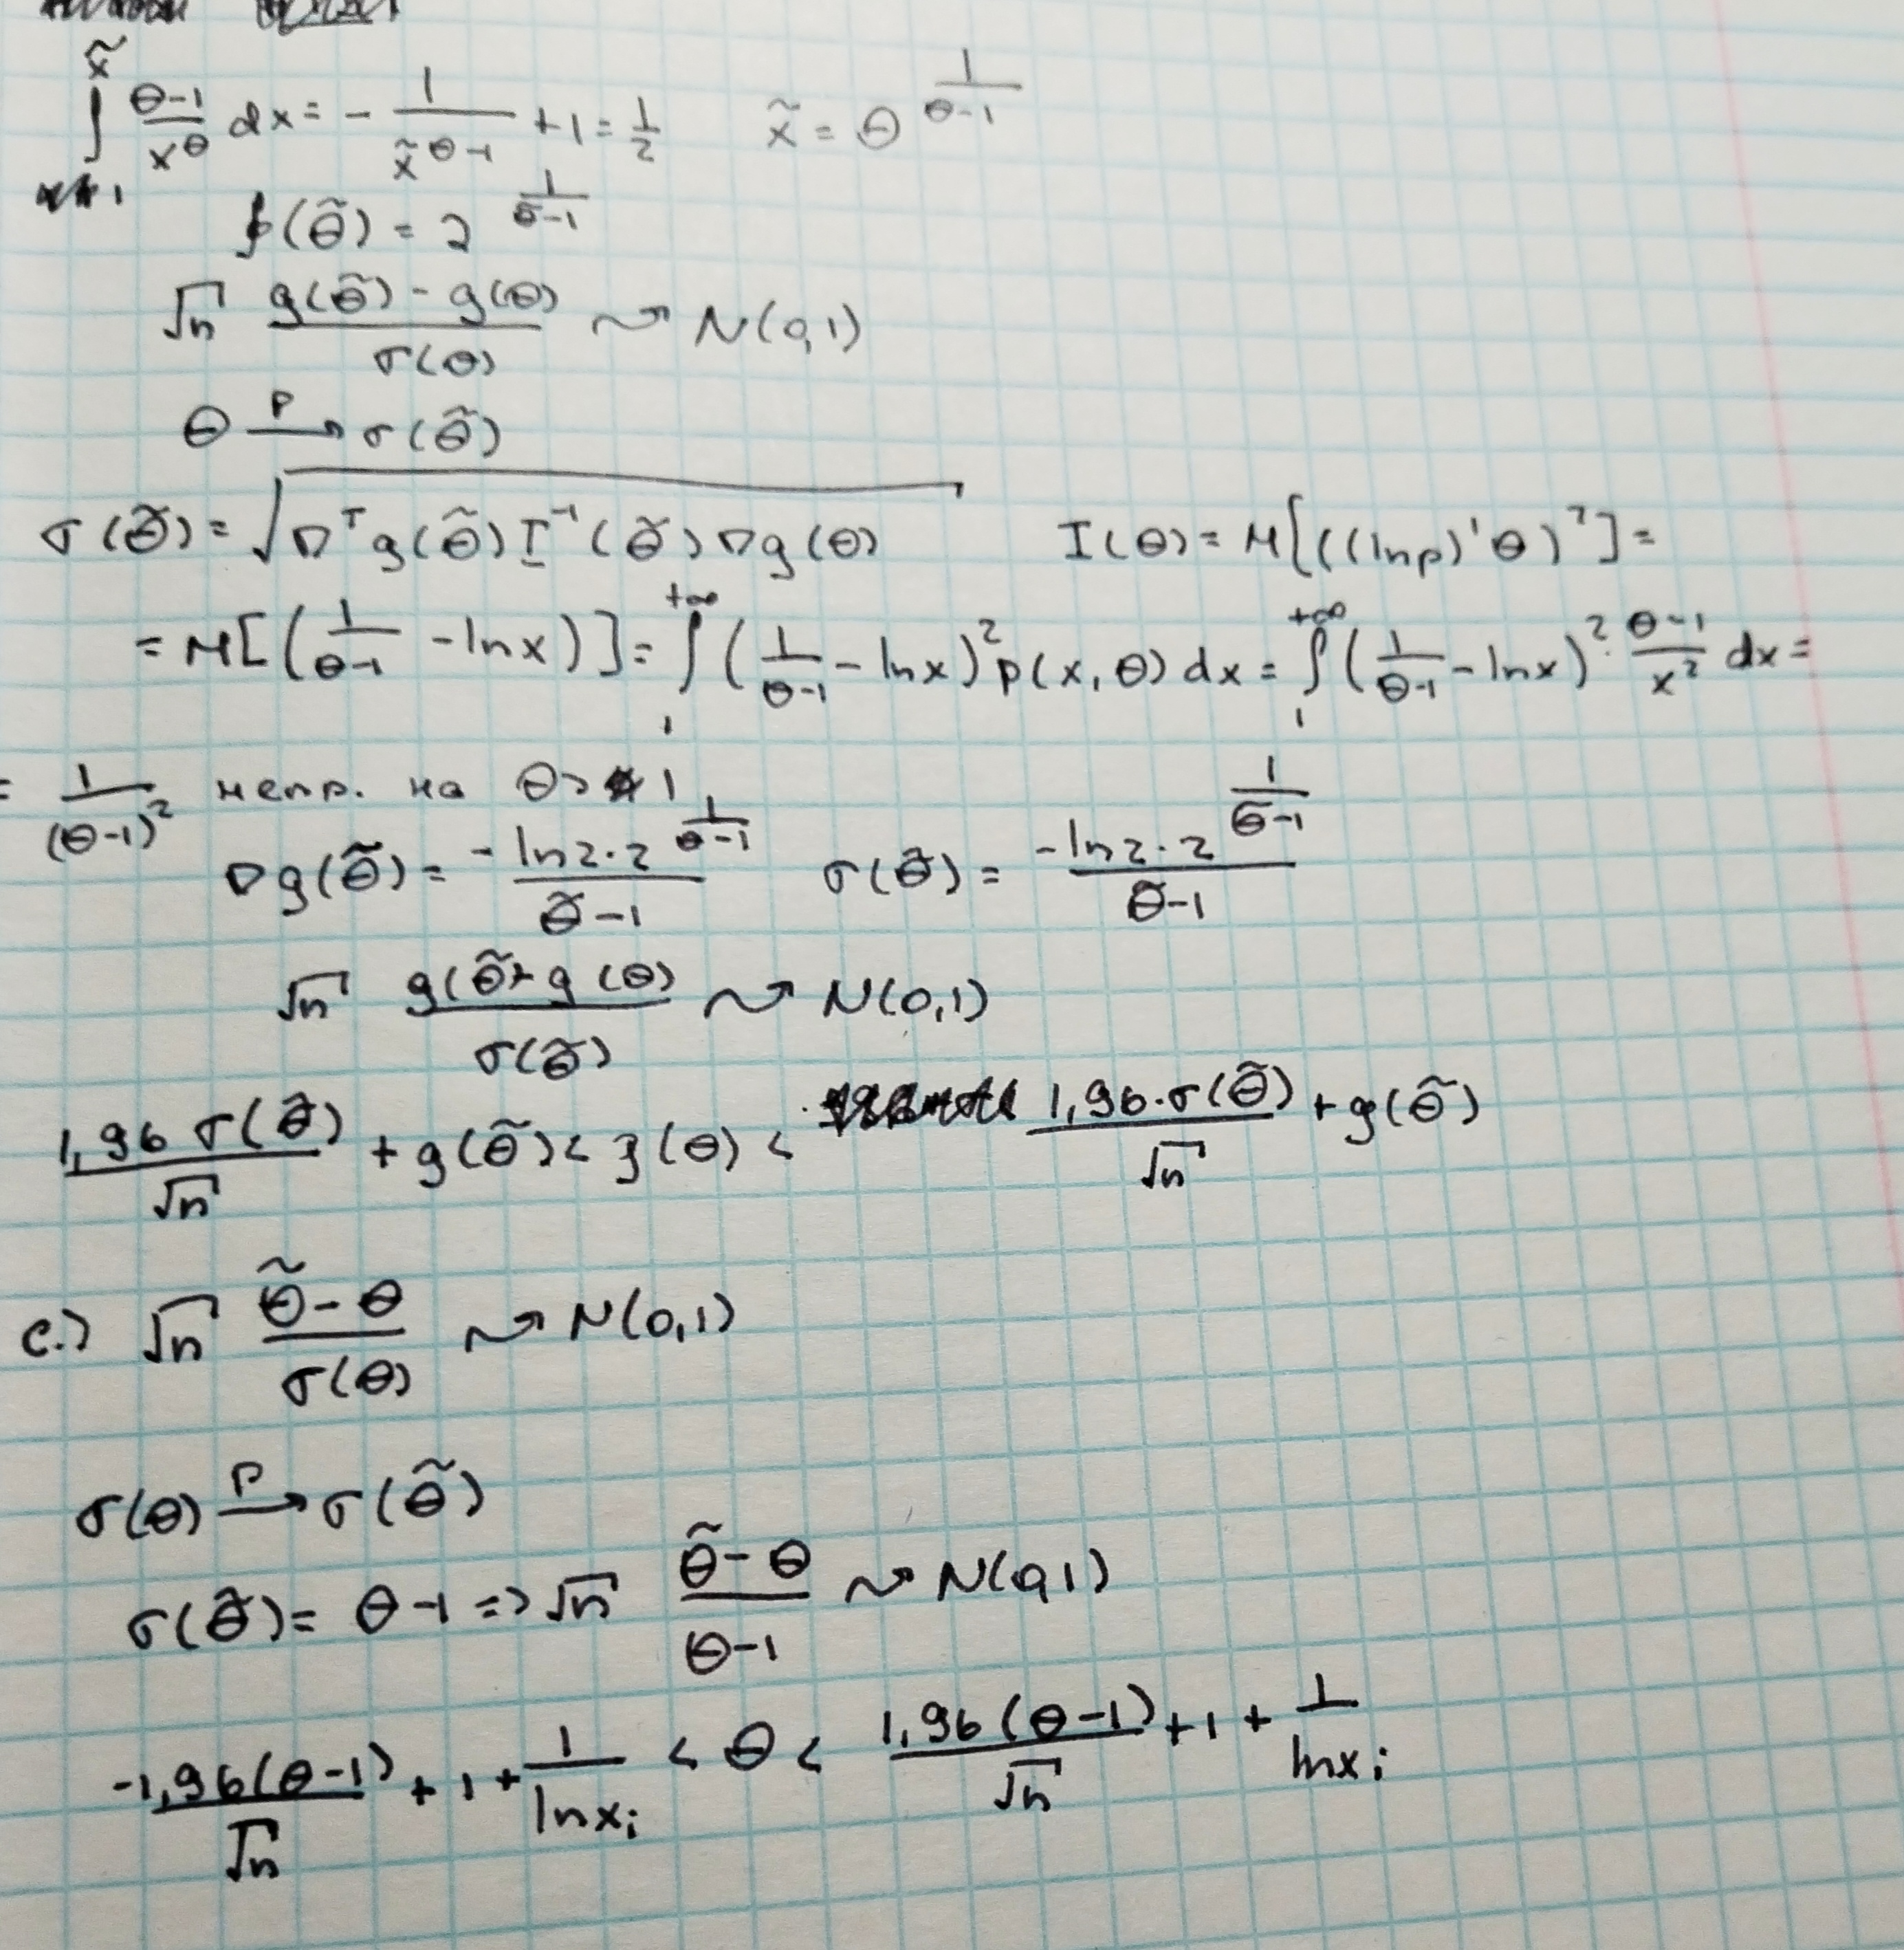

In [3]:
Image("pics/task_6_2.jpg")

In [4]:
IMG_DIRECTORY = "..\\img"

def get_image(task_name: str, index: str) -> str:
    return os.path.join(IMG_DIRECTORY, task_name + "_" + str(index) + ".jpg")

def get_task_imgs(task_name: str) -> list[str]:
    i = 1
    file_path = get_image(task_name, i)
    task_pictures = []
    while os.path.isfile(file_path):
        task_pictures.append(file_path)
        i += 1
        file_path = get_image(task_name, i)
    return task_pictures

def show(task_name: str) -> None:
    task_imgs = get_task_imgs(task_name)
    for img_path in task_imgs:
        img = cv2.imread(img_path, 0)
        plt.figure()
        plt.imshow(img)
        plt.axis('off')

    plt.show()

In [5]:
show("T6")

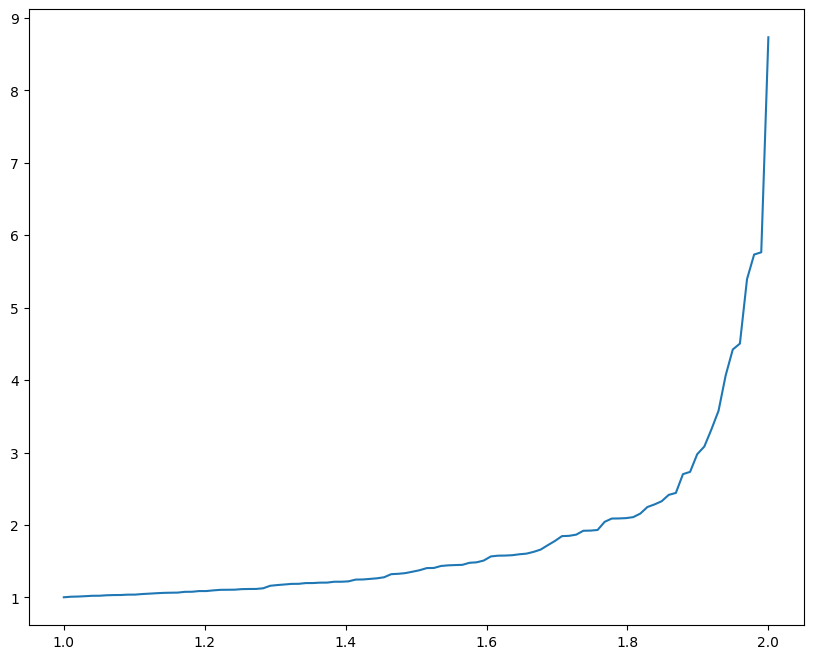

In [6]:
def f_1(x, tetha):
    return (1 - x) ** (1 / (1 - tetha))

a = 0.05
tetha = 3
N = 100

np.random.seed(42)
X = [f_1(x, tetha) for x in np.random.sample(N)]
X.sort()
x = np.linspace(1, 2, 100)
plt.plot(x, X)
plt.show()

In [7]:
tetha_estimate = N / np.sum(np.log(X)) + 1
print("ОМП: Оценка = ", tetha_estimate)

right = (1.96 * np.log(2) * (2 ** (1 / (tetha_estimate - 1)))) / (tetha_estimate - 1) / 10 + 2 ** (1 / (tetha_estimate -1))
left = (-(1.96 * np.log(2) * (2 ** (1 / (tetha_estimate - 1)))) / (tetha_estimate - 1) / 10 + 2 ** (1 / (tetha_estimate -1)))
print("Доверительный размах для медианы: [", left, ', ', right, ']')
print("Размах = ", right - left)

ОМП: Оценка =  3.1863944109696107
Доверительный размах для медианы: [ 1.287723199859717 ,  1.4583574933745918 ]
Размах =  0.1706342935148748


In [8]:

left_1 = -1.96 * (tetha_estimate - 1) / np.sqrt(N) + tetha_estimate
right_1 = 1.96 * (tetha_estimate - 1) / np.sqrt(N) + tetha_estimate

print("Асимптотический доверительный интервал: [", left_1, ', ', right_1, ']')
print("Размах = ", right_1 - left_1)

Асимптотический доверительный интервал: [ 2.757861106419567 ,  3.6149277155196544 ]
Размах =  0.8570666091000874


In [9]:
def f_2(X, N):
    return 1 + N / sum([np.log(x) for x in X])

M = np.sort(np.array([f_2([f_1(x, tetha) for x in np.random.sample(N)], N) for i in range(50000)]))

left_2 = M[int(a / 2 * 50000)]
right_2 = M[int((1 - a / 2) * 50000)]

print("Бутстраповский параметрический интервал: [", left_2, ', ', right_2, ']')
print("Размах = ", right_2 - left_2)

Бутстраповский параметрический интервал: [ 2.659065105749759 ,  3.457153041895431 ]
Размах =  0.7980879361456719


In [10]:
M = np.array([])
for i in range(1000):
    M = np.append(M, N / np.sum(np.log((np.random.choice(X, size = len(X))))) + 1 - tetha_estimate)

M = np.sort(M)

left_3 = tetha_estimate + M[74]
right_3 = tetha_estimate + M[974]

print("Непараметрический интервал bootstrap: [", left_3, ', ', right_3, ']')
print("Размах = ", left_3, ', ', right_3, ']')

Непараметрический интервал bootstrap: [ 2.9195668464145164 ,  3.71398285022294 ]
Размах =  2.9195668464145164 ,  3.71398285022294 ]


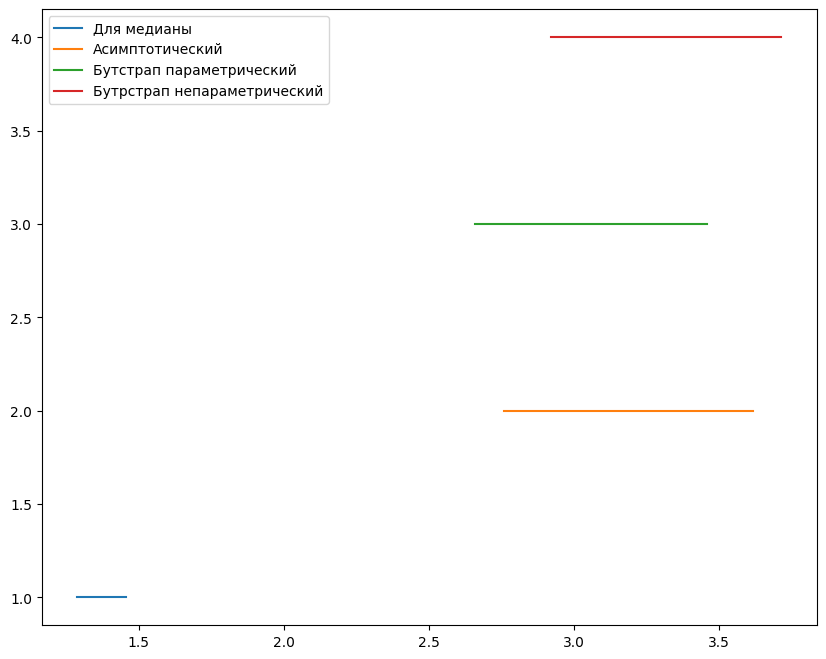

In [11]:
x = np.linspace(left, right, 100)
y = [1] * 100
plt.plot(x, y)

x1 = np.linspace(left_1, right_1, 100)
y1 = [2] * 100
plt.plot(x1, y1)

x2 = np.linspace(left_2, right_2, 100)
y2 = [3] * 100
plt.plot(x2, y2)

x3 = np.linspace(left_3, right_3, 100)
y3 = [4] * 100
plt.plot(x3, y3)


plt.legend(["Для медианы", "Асимптотический", "Бутстрап параметрический", "Бутрстрап непараметрический"])